In [68]:
import matplotlib.pyplot as plt
%run "packages.ipynb"

In [69]:
# Get the current directory
current_dir = os.getcwd()

# Define the file path to the dataset relative to the current directory
file_path = os.path.join(current_dir, '..', 'Data', 'data.xlsx')

# Load the dataset into a DataFrame
df = pd.read_excel(file_path)



In [70]:
df.head()

,Student_ID,Sex,Social Status,Age,Governorate,Living,Mother education,Father education,Family member Education,Father Alive,...,economy/bio,Avg1,Islamea.1,arabic.1,english.1,math.1,physics.1,chemistry.1,economy/bio.1,Avg1.1
0,1,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,70,55,69,50,60,41,59,50,69,57
1,2,Male,single,3,baghdad,city,medium,higher,yes,yes,...,87,70,65,87,68,85,64,61,69,71
2,3,Male,single,2,baghdad,city,Illiterate,secondary,no,yes,...,58,54,44,50,46,45,55,30,43,45
3,4,Male,coupled,3,baghdad,city,ba,ba,yes,yes,...,92,73,60,55,60,55,70,73,80,65
4,5,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,60,34,40,32,28,25,35,25,40,32


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student_ID                120 non-null    int64 
 1   Sex                       120 non-null    object
 2   Social Status             120 non-null    object
 3   Age                       120 non-null    int64 
 4   Governorate               120 non-null    object
 5   Living                    120 non-null    object
 6   Mother education          120 non-null    object
 7   Father education          120 non-null    object
 8   Family member Education   120 non-null    object
 9   Father Alive              120 non-null    object
 10  Mother Alive              120 non-null    object
 11  Family Size               120 non-null    int64 
 12  Parent Apart              120 non-null    object
 13  The Guardian              21 non-null     object
 14  Family Relationship       

In [72]:
df.columns

Index(['Student_ID', 'Sex', 'Social Status', 'Age', 'Governorate', 'Living',
       'Mother education', 'Father education', 'Family member Education',
       'Father Alive', 'Mother Alive', 'Family Size', 'Parent Apart',
       'The Guardian', 'Family Relationship', 'Father Job', 'Mother Job',
       'Education Fee', 'Secondary Job', 'Home Ownership', 'Study Room',
       'Family Economic Level', 'You  chronic disease',
       'Family Chronic Disease', 'Specialization', 'Study willing',
       'Reason of study', 'Attendance', 'Failure Year',
       'Higher Education Willing', 'References Usage', 'Internet Usage',
       'TV Usage', 'Sleep Hour', 'Study Hour', 'Arrival Time', 'Transport',
       'Holiday Effect', 'Worry Effect', 'Parent Meeting', 'Islamea', 'arabic',
       'english', 'math', 'physics', 'chemistry', 'economy/bio', 'Avg1',
       'Islamea.1', 'arabic.1', 'english.1', 'math.1', 'physics.1',
       'chemistry.1', 'economy/bio.1', 'Avg1.1'],
      dtype='object')

In [73]:
#handling missing values and selecting relevant features
missing_values = df.isnull().sum()
missing_values

Student_ID                   0
Sex                          0
Social Status                0
Age                          0
Governorate                  0
Living                       0
Mother education             0
Father education             0
Family member Education      0
Father Alive                 0
Mother Alive                 0
Family Size                  0
Parent Apart                 0
The Guardian                99
Family Relationship          0
Father Job                   0
Mother Job                   0
Education Fee                0
Secondary Job                0
Home Ownership               0
Study Room                   0
Family Economic Level        0
You  chronic disease         0
Family Chronic Disease       0
Specialization               0
Study willing                0
Reason of study              0
Attendance                   0
Failure Year                 0
Higher Education Willing     0
References Usage             0
Internet Usage               0
TV Usage

In [74]:
#handling missing values
df=df.dropna()

Exploratory data analysis

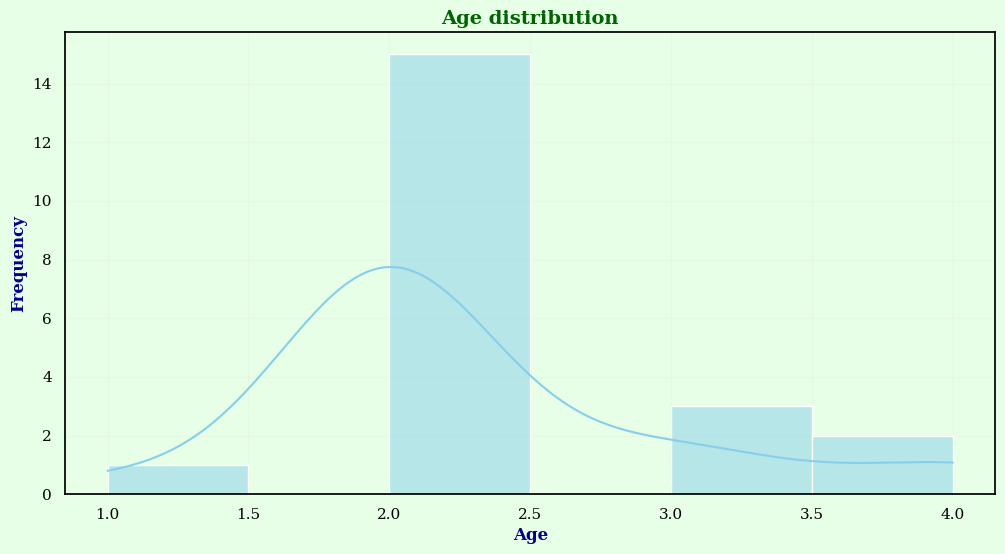

In [75]:
#plotting distribution of ages

plt.figure(figsize=(12,6))
sns.histplot(df['Age'],kde=True,color='skyblue')
plt.title("Age distribution",fontsize=14,fontweight='bold',color='darkgreen')
plt.xlabel("Age",fontsize=12, fontweight="bold",color='darkblue')
plt.ylabel("Frequency",fontsize=12, fontweight="bold",color='darkblue')
#plt.savefig("Age distribution.png")
plt.show()


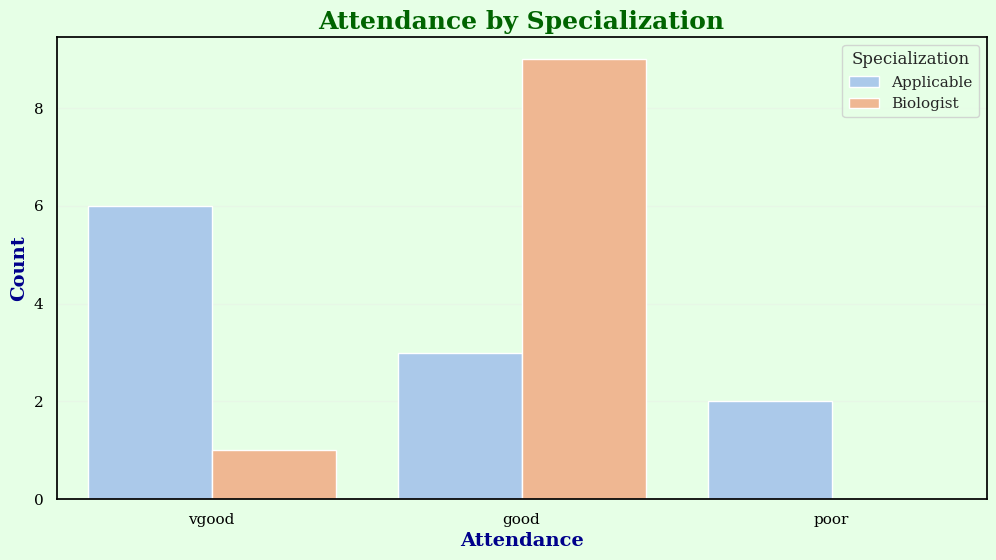

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x="Attendance",hue='Specialization',data=df, palette='pastel')
plt.title('Attendance by Specialization', fontsize=18,fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Attendance', fontsize=14, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize=14, fontweight = 'bold', color = 'darkblue')
plt.legend(title='Specialization', labels=['Applicable', 'Biologist'])
ax = plt.gca()
#ax.set_facecolor('#F0F0F0')
#plt.savefig('Attendance by Specialization.png')
plt.show()

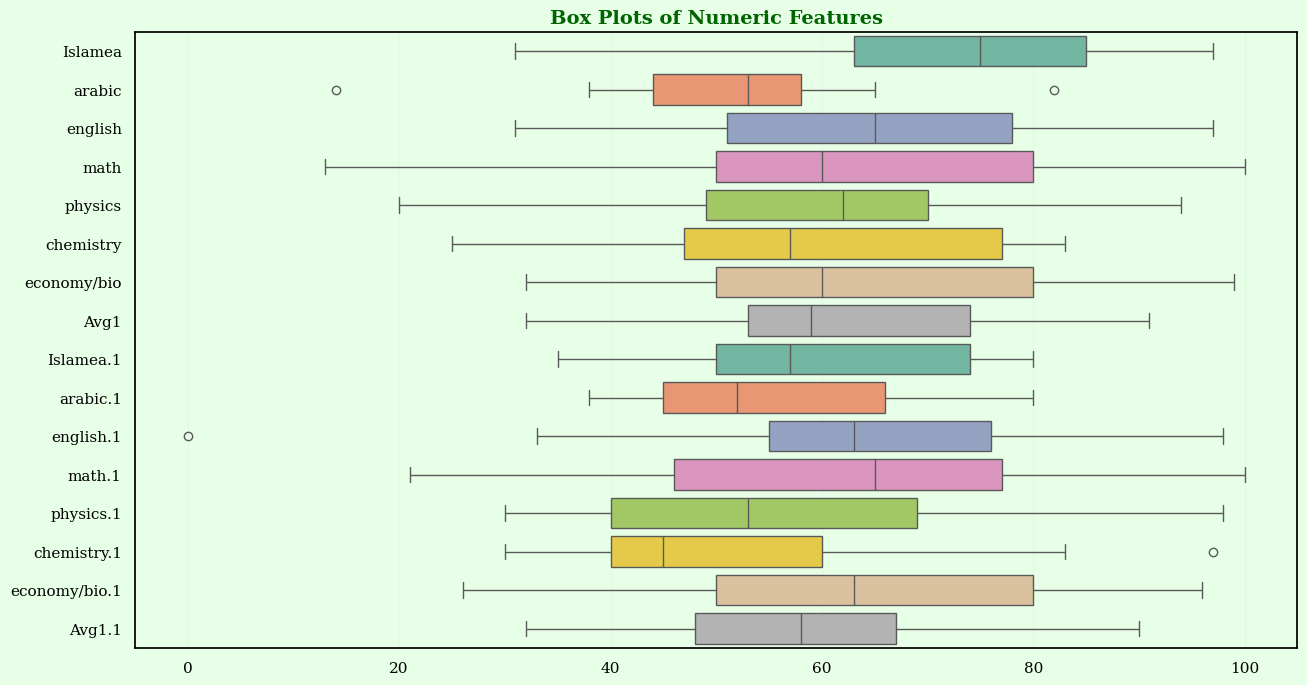

In [77]:
# Selecting relevant numeric features
numeric_features = ['Islamea', 'arabic', 'english', 'math', 'physics', 'chemistry', 'economy/bio', 
                    'Avg1', 'Islamea.1', 'arabic.1', 'english.1', 'math.1', 'physics.1', 'chemistry.1', 'economy/bio.1', 'Avg1.1']

# Box plots for selected numeric features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_features], orient="h", palette="Set2")
plt.title("Box Plots of Numeric Features", fontsize = 14, fontweight = 'bold', color = 'darkgreen')
#plt.savefig('Box Plots of Numeric Features.png')
plt.show()

In [78]:
# Calculate summary statistics for numeric columns
numeric_summary = df.describe()

# Calculate counts and unique values for categorical columns
categorical_summary = df.describe(include=['object'])

# Display the summary statistics
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)



Summary Statistics for Numeric Columns:
       Student_ID        Age  Family Size  Internet Usage   TV Usage  \
count   21.000000  21.000000    21.000000       21.000000  21.000000   
mean    60.619048   2.285714     0.476190        0.523810   0.095238   
std     36.004828   0.717137     0.679636        0.749603   0.436436   
min      6.000000   1.000000     0.000000        0.000000   0.000000   
25%     38.000000   2.000000     0.000000        0.000000   0.000000   
50%     55.000000   2.000000     0.000000        0.000000   0.000000   
75%     88.000000   2.000000     1.000000        1.000000   0.000000   
max    119.000000   4.000000     2.000000        2.000000   2.000000   

       Sleep Hour  Study Hour  Arrival Time    Islamea     arabic  ...  \
count   21.000000   21.000000     21.000000  21.000000  21.000000  ...   
mean     1.190476    2.000000      0.238095  71.190476  51.380952  ...   
std      0.872872    0.948683      0.436436  16.729074  13.551665  ...   
min      0.0000

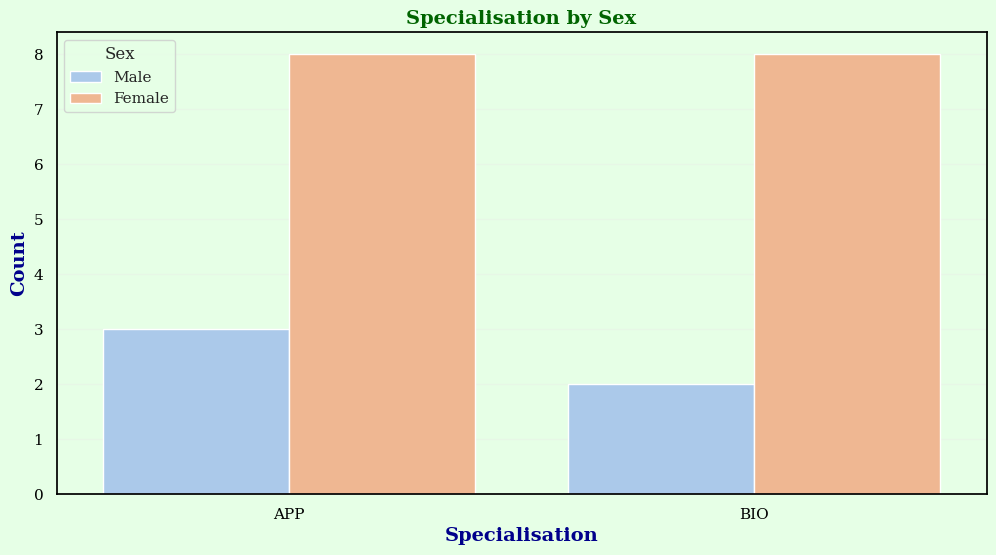

In [79]:
#visualisation by gender

plt.figure(figsize=(12,6))
sns.countplot(x="Specialization", hue='Sex',data=df, palette='pastel')
plt.title("Specialisation by Sex",fontsize=14,fontweight="bold",color="darkgreen")
plt.xlabel('Specialisation', fontsize=14, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize=14, fontweight = 'bold', color = 'darkblue')
#plt.legend(title='Sex', labels=['Female', 'Male'])
ax = plt.gca()
#ax.set_facecolor('#F0F0F0')
#plt.savefig('Specialisation by Sex.png')
plt.show()

In [80]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

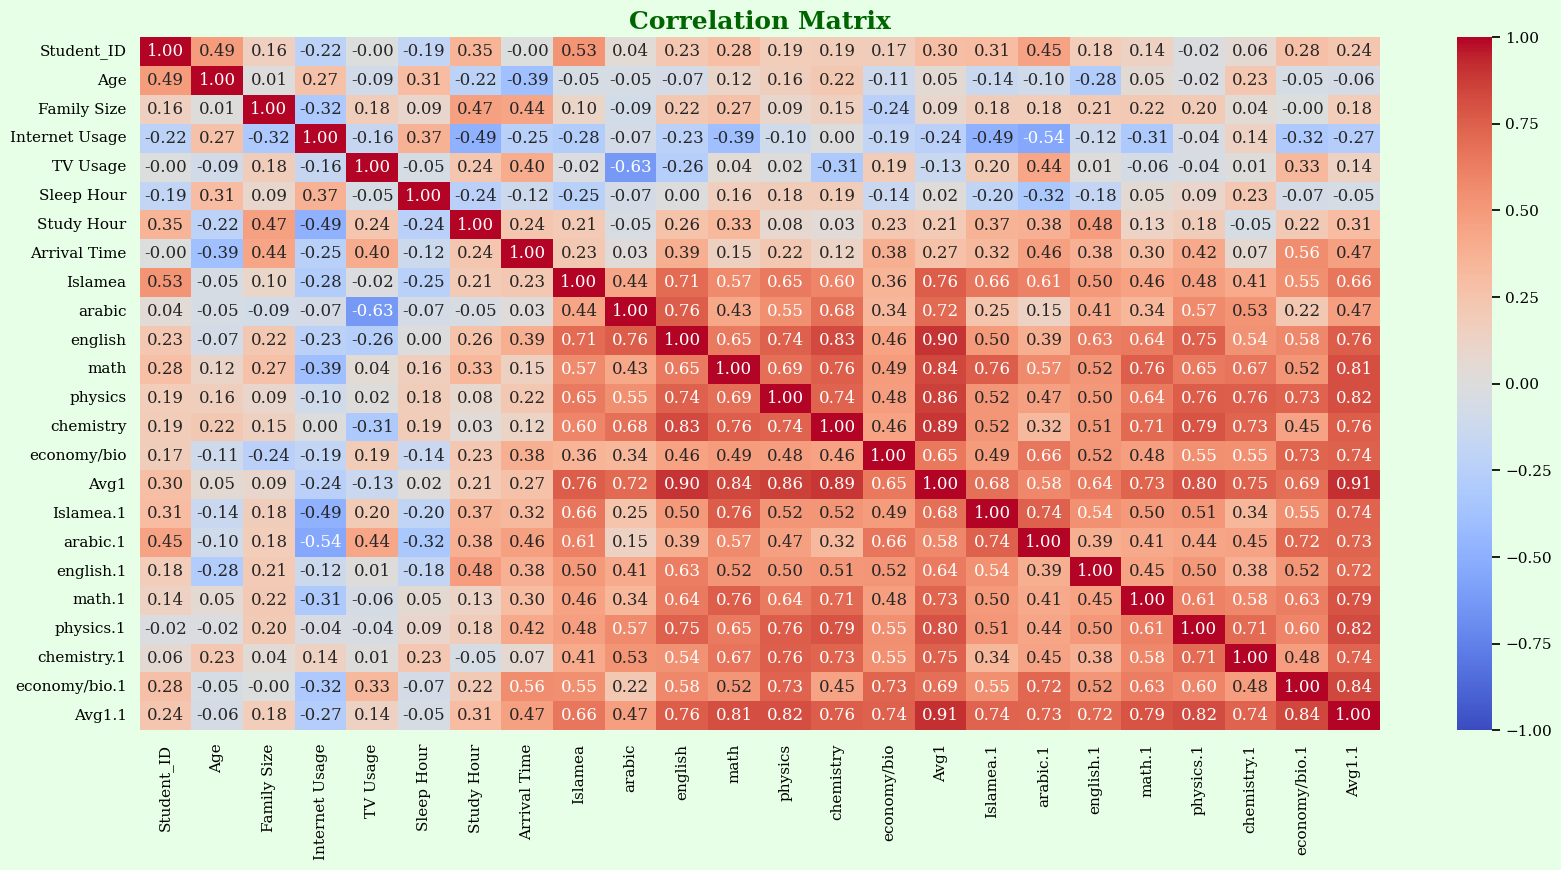

In [81]:
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=18, fontweight = 'bold', color = 'darkgreen')
#plt.savefig('Correlation Matrix.png')
plt.show()